<a href="https://colab.research.google.com/github/Svendpasak/Capstone-Project-SP/blob/master/USDT_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tahap Preprocessing
import keras
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import random as set_random_seed
from sklearn.preprocessing import MinMaxScaler
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from keras.models import sequential
from keras.layers import Dense,LSTM, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
from tensorflow.python.keras import Sequential
plt.style.use("fivethirtyeight")
#import random as set_random_seed

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ADA-USD.csv to ADA-USD.csv


In [ ]:
df = pd.read_csv("data set USDT-USD.csv", index_col=0)
df.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000
2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032
2017-11-14,1.00524,1.01343,0.996898,1.00683,1.00683,429857984


In [ ]:
df.shape

(1330, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 2017-11-09 to 2021-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1330 non-null   float64
 1   High       1330 non-null   float64
 2   Low        1330 non-null   float64
 3   Close      1330 non-null   float64
 4   Adj Close  1330 non-null   float64
 5   Volume     1330 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 72.7+ KB


In [ ]:
# Tahap Data Cleaning (Missing Value)
ADA = df.fillna(0)
ADA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-26,0.999855,1.001321,0.999686,1.001214,1.001214,60323833680
2021-06-27,1.001260,1.002000,1.000524,1.000642,1.000642,53158745469
2021-06-28,1.000689,1.000803,0.999883,0.999928,0.999928,56773812735
2021-06-29,0.999951,1.000811,0.999901,1.000024,1.000024,64868482234
2021-06-30,1.000053,1.000634,0.999706,1.000216,1.000216,62591206838


In [ ]:
# Pengecekan data Missing Value
ADA.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0, 0.5, 'Close Price')

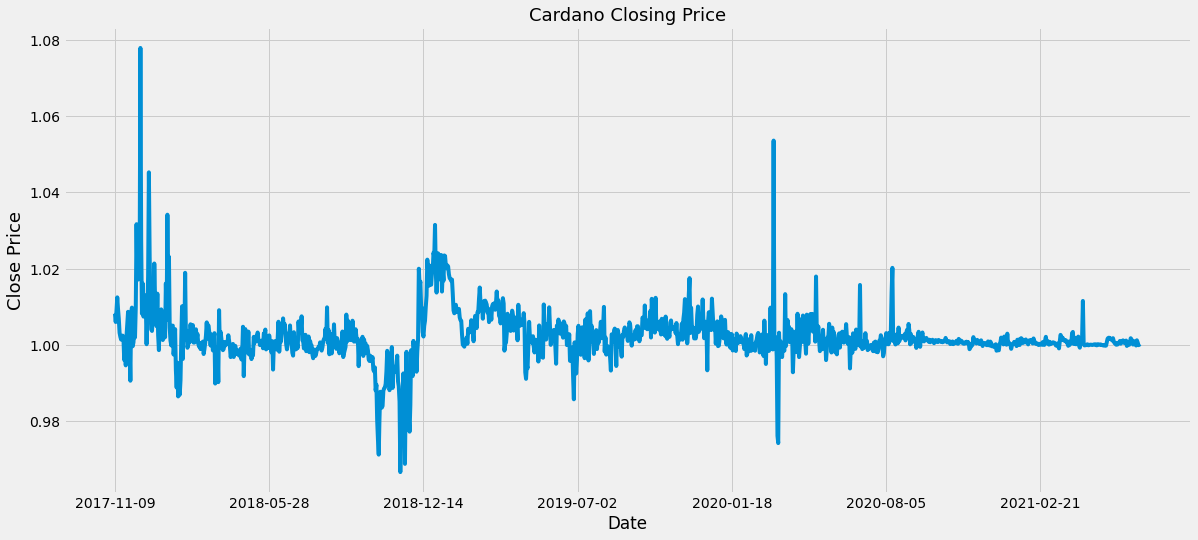

In [ ]:
# Visualize the Closing Price
ADA["Close"].plot(figsize=(18,8))
plt.title("Cardano Closing Price", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)

In [ ]:
# Create a new dataframe with only the "Close" cloumn
ADA = ADA.filter(["Close"])
# Convert the dataframe to a numpy array
ADA1 = ADA.values
# Get the number of Rows to train the model on
training_data_len = math.ceil(len(ADA1)*.80)
training_data_len

1064

In [ ]:
# Scale the Data for Normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(ADA1)
scaled_data

array([[0.37340429],
       [0.35389622],
       [0.38068611],
       ...,
       [0.29921968],
       [0.30008271],
       [0.30180877]])

In [ ]:
# Create the training data set
# create the scaled training data set
train_data = scaled_data[0: training_data_len, :]
# Split the Data into x_train and y_train data set
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])
    if i <=  31:
        print(x_train)
        print(y_train)
        print()  

[array([0.37340429, 0.35389622, 0.38068611, 0.41197094, 0.38392247,
       0.36126793, 0.32845482, 0.31892553, 0.3123629 , 0.32063361,
       0.32180229, 0.31712755, 0.26432989, 0.30121543, 0.2516002 ,
       0.32081341, 0.34850228, 0.37789924, 0.31146391, 0.30112553,
       0.21541587, 0.3726851 , 0.38778813, 0.29675645, 0.30580028,
       0.33285987, 0.31757704, 0.38895681, 0.58448704, 0.45808911])]
[0.45386385702470555]

[array([0.37340429, 0.35389622, 0.38068611, 0.41197094, 0.38392247,
       0.36126793, 0.32845482, 0.31892553, 0.3123629 , 0.32063361,
       0.32180229, 0.31712755, 0.26432989, 0.30121543, 0.2516002 ,
       0.32081341, 0.34850228, 0.37789924, 0.31146391, 0.30112553,
       0.21541587, 0.3726851 , 0.38778813, 0.29675645, 0.30580028,
       0.33285987, 0.31757704, 0.38895681, 0.58448704, 0.45808911]), array([0.35389622, 0.38068611, 0.41197094, 0.38392247, 0.36126793,
       0.32845482, 0.31892553, 0.3123629 , 0.32063361, 0.32180229,
       0.31712755, 0.26432989, 0.

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1034, 30, 1)

In [ ]:
# Fitting / Build the Model
model = keras.Sequential()
model.add(layers.LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(layers.Dense(1))

In [ ]:
# Compile the Model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# Ftting / Train the Model
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
33/33 [==============================] - 10s 64ms/step - loss: 0.0125
Epoch 2/100
33/33 [==============================] - 2s 67ms/step - loss: 0.0050
Epoch 3/100
33/33 [==============================] - 2s 65ms/step - loss: 0.0044
Epoch 4/100
33/33 [==============================] - 2s 66ms/step - loss: 0.0042
Epoch 5/100
33/33 [==============================] - 2s 66ms/step - loss: 0.0040
Epoch 6/100
33/33 [==============================] - 2s 66ms/step - loss: 0.0040
Epoch 7/100
33/33 [==============================] - 2s 66ms/step - loss: 0.0041
Epoch 8/100
33/33 [==============================] - 2s 68ms/step - loss: 0.0040
Epoch 9/100
33/33 [==============================] - 2s 66ms/step - loss: 0.0038
Epoch 10/100
33/33 [==============================] - 2s 65ms/step - loss: 0.0039
Epoch 11/100
33/33 [==============================] - 2s 65ms/step - loss: 0.0038
Epoch 12/100
33/33 [==============================] - 2s 65ms/step - loss: 0.0037
Epoch 13/100
33/33 [====

In [ ]:
# Create the testing data set
# Create a new array containing scale values from index .... to the end of data set
test_data = scaled_data[training_data_len-30:,:]

In [ ]:
# Created the data set x_test and y_test
x_test = []
y_test = ADA1[training_data_len:,:]#---rest of the data
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [ ]:
# Convert the Data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
# Get the model predicted price values / Denormalize
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, predictions)*100
print(MAPE)

0.05297020886586805


In [ ]:
# Plot the Data
train =ADA[:training_data_len]
valid =ADA[training_data_len:]
valid["predictions"] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


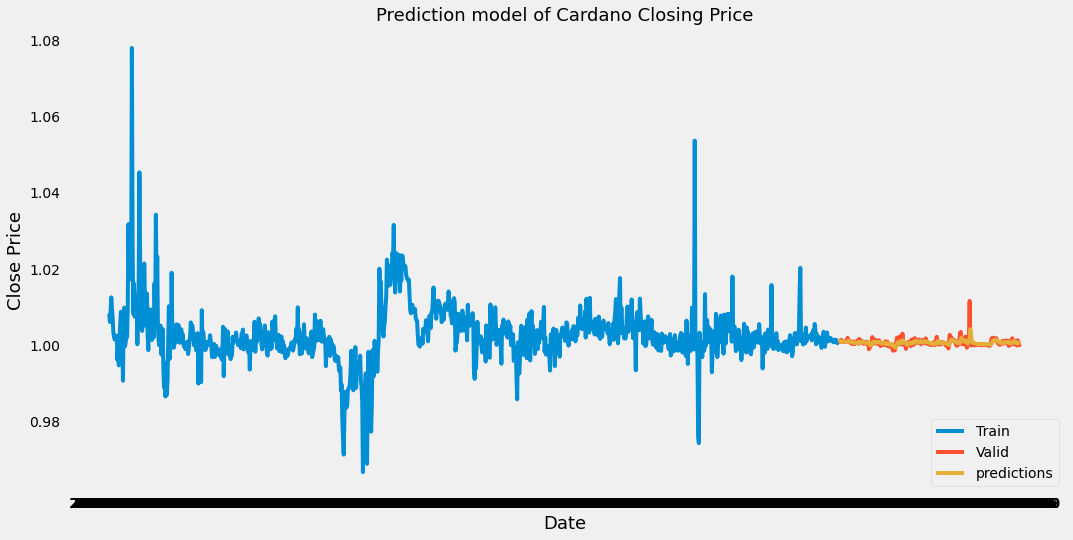

In [ ]:
# Visualize the Data
plt.figure(figsize=(16,8))
plt.title("Prediction model of Cardano Closing Price", fontsize=18)
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["Train","Valid","predictions"],loc="lower right")
plt.grid()
plt.show()

In [ ]:
#Show The Valid and Predicted Prices
valid[["Close" , "predictions"]]

,Close,predictions
Date,,
2020-10-08,1.001252,1.000711
2020-10-09,1.001180,1.000862
2020-10-10,1.000884,1.000947
2020-10-11,1.000734,1.000893
2020-10-12,1.001302,1.000801
...,...,...
2021-06-26,1.001214,1.000344
2021-06-27,1.000642,1.000615
2021-06-28,0.999928,1.000669


In [ ]:
valid2 = valid[["Close" , "predictions"]]
valid2.head(20)

,Close,predictions
Date,,
2020-10-08,1.001252,1.000711
2020-10-09,1.001180,1.000862
2020-10-10,1.000884,1.000947
2020-10-11,1.000734,1.000893
2020-10-12,1.001302,1.000801
2020-10-13,1.001111,1.000909
2020-10-14,1.001007,1.000944
2020-10-15,1.000796,1.000921
2020-10-16,1.001047,1.000841


In [ ]:
# Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9.763762452549027e-06